In [18]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [19]:
# These are the parameters that can be tweaked
N = 1000
TMAX=1
TMIN=0
numiters = 1000
epsilon=0.05


T = Symbol('T')
Tvals = np.linspace(TMIN,TMAX,N)

# for 1st part, we have taken curve as => r(t) = 2ti + (1-3t)j + (5+4t)k
X = 2*T
Y = 1-3*T
Z = 5+4*T

# Part 2, cubic Bezier curve segment  these are the 4 points taken. 
# P(t) = (1−t)3P1 + 3(1−t)2tP2 +3(1−t)t2P3 + t3P4

########
#To use part 2 (cubic Bezier curve segment), uncomment everything below in this cell
#########

P1 = [10,10,10]
P2 = [0,5,10]
P3 = [0,0,10]
P4 = [10,0,0]

def get_eq(m):
     return ((1-T)**3)*P1[m] + 3*((1-T)**2)*T*P2[m] + 3*(1-T)*(T**2)*P3[m] + (T**3)*P4[m]
X = get_eq(0)
Y = get_eq(1)
Z = get_eq(2)



X= 10*T**3 + 10*(1 - T)**3
Y= 15*T*(1 - T)**2 + 10*(1 - T)**3
Z= 10*T**2*(3 - 3*T) + 30*T*(1 - T)**2 + 10*(1 - T)**3
Equation => r(t) = (10*T**3 + 10*(1 - T)**3)i + (15*T*(1 - T)**2 + 10*(1 - T)**3)j + (10*T**2*(3 - 3*T) + 30*T*(1 - T)**2 + 10*(1 - T)**3)k


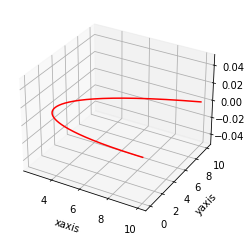

In [20]:
print("X=",X)
print("Y=",Y)
print("Z=",Z)
fx = lambdify(T,X,'numpy')
Xvals = fx(Tvals)
fy = lambdify(T,Y,'numpy')
Yvals = fy(Tvals)
fz = lambdify(T,Z,'numpy')
Zvals = fz(Tvals)
r = [X,Y,Z] # this is the actual curve in i,j,k components
print(f"Equation => r(t) = ({X})i + ({Y})j + ({Z})k")
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(Xvals,Yvals, 'red')
ax.set_xlabel("xaxis")
ax.set_ylabel("yaxis")
plt.show()

In [21]:
def velocityexp(function):
    """
    This function computes the expression for velocity of each component by using derivatives
    """
    vel = [i.diff(T) for i in function]
    return vel

def velocity(function, t=TMAX):
    """
    This function computes the actual velocity in values
    """
    vel = velocityexp(function)
    nums = int(t*N/TMAX)
    vel_vals =  [lambdify(T,i,'numpy')(Tvals)[:nums] if not i.is_constant() else np.full_like(Tvals, i)[:nums] for i in vel]
    return vel_vals

def speed(function, t=TMAX):
    """
    This computes the speed using the velocity
    """
    nums = int(t*N/TMAX)
    vel_vals = velocity(function, t)
    squared_sum = vel_vals[0]*vel_vals[0]
    for i in vel_vals[1:]:
        squared_sum += i*i
    return np.sqrt(squared_sum)


In [22]:
def Arclength(function,tval):
    """
    This function computes the arclength till a given t value
    by doing numeric integration
    np.trapz is being used for integration
    """
    nums = int(tval*N/TMAX)
    sp = speed(r,tval)
    return np.trapz(speed(r,tval),Tvals[:nums])

In [23]:
L = Arclength(r,TMAX)
print("Total length=",L)
print("Make sure you choose the s below between 0 and total length")

Total length= 23.203433402020263
Make sure you choose the s below between 0 and total length


In [24]:
def GetCurveParameter(function, s):
    """
    This is the main function for getting the curve parameter
    """
    t = TMIN + (TMAX-TMIN)*(s/L)
    lower = TMIN
    upper=TMAX
    for it in range(numiters):
        F = Arclength(r,t) - s
        if abs(F) <= epsilon:
            return t
        dFdt = speed(r,t)[-1]
        tcandidate = t - F/dFdt
        if (F>0) :
            upper=t
            if (tcandidate <= lower):
                t = (upper+lower)/2
            else:
                t = tcandidate
        else:
            lower=t
            if tcandidate >=upper:
                t = (upper+lower)/2
            else:
                t = tcandidate
    return t

        

In [25]:
# choose s betweeen 0 and L
s=1 # s=1 for unit parameterization
finalt = GetCurveParameter(r,s)
print(f"t for given arclength s={s} is ", finalt)

t for given arclength s=1 is  0.031502896205294645
